<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Videojuegos ICE

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

### Paso 1: Abrir el archivo de datos

In [1]:
import pandas as pd

df = pd.read_csv('/datasets/games.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Paso 2: Preparación de los datos

### 2.1 Reemplaza los nombres de las columnas

In [2]:
df.columns = df.columns.str.lower()
print(df.head(15))

                           name platform  year_of_release         genre  \
0                    Wii Sports      Wii           2006.0        Sports   
1             Super Mario Bros.      NES           1985.0      Platform   
2                Mario Kart Wii      Wii           2008.0        Racing   
3             Wii Sports Resort      Wii           2009.0        Sports   
4      Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                        Tetris       GB           1989.0        Puzzle   
6         New Super Mario Bros.       DS           2006.0      Platform   
7                      Wii Play      Wii           2006.0          Misc   
8     New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                     Duck Hunt      NES           1984.0       Shooter   
10                   Nintendogs       DS           2005.0    Simulation   
11                Mario Kart DS       DS           2005.0        Racing   
12  Pokemon Gold/Pokemon 

### 2.2 Convierte los datos en los tipos necesarios.

In [3]:
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

### 2.3 Elige la manera de tratar los valores ausentes

In [4]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

#### Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
Se dejo en blanco la variable year_of_release porque algunos juegos no tienen de forma clara la fecha de lanzamiento y esto puede deberse a que los juegos fueron postergados o cancelados y de preferencia se dejo NaN para no llenar de fechas falsas y que esto cambie el análisis.

En el caso de la variable user_score y critic_score se tienen valores ausentes ya que algunos juegos por ser nuevos o poco conocidos no recibieron sufiecientes críticas como para ser considerados y no se rellenaron además de que seran excluidos para no afectar promedios o otros análisis que pueden cambiar por dichos datos.

Los valores tbd fueron reemplazados por NaN al no representar puntuaciones reales.

In [5]:
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

### 2.4 Calcula las ventas totales

In [6]:
df['global_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


### Paso 3: Analiza los datos

<AxesSubplot:>

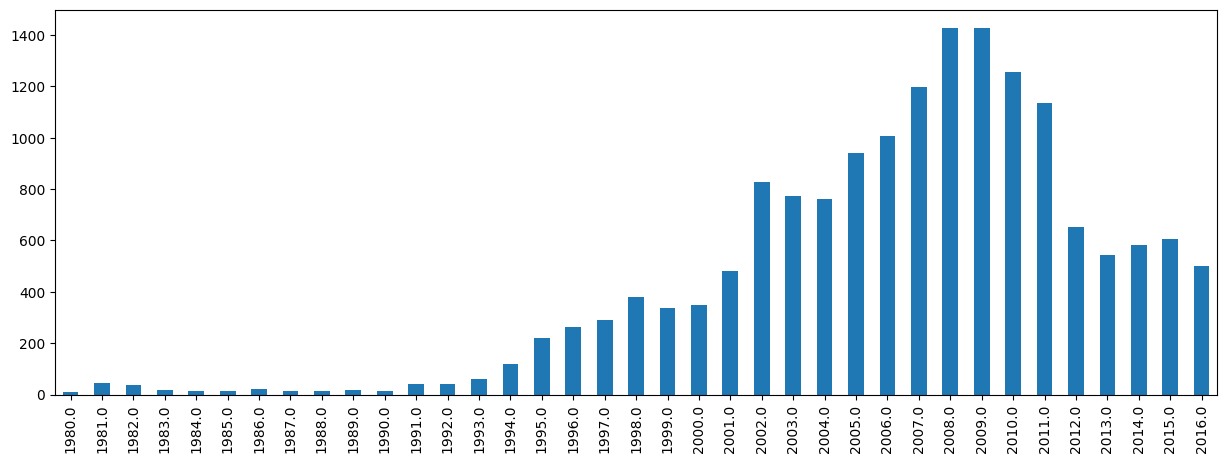

In [7]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
df['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


In [8]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
platform_sales = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
platform_sales.head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: global_sales, dtype: float64

In [9]:
top_platforms = platform_sales.head(6).index
sales_by_year = df[df['platform'].isin(top_platforms) & df['year_of_release'].notna()]

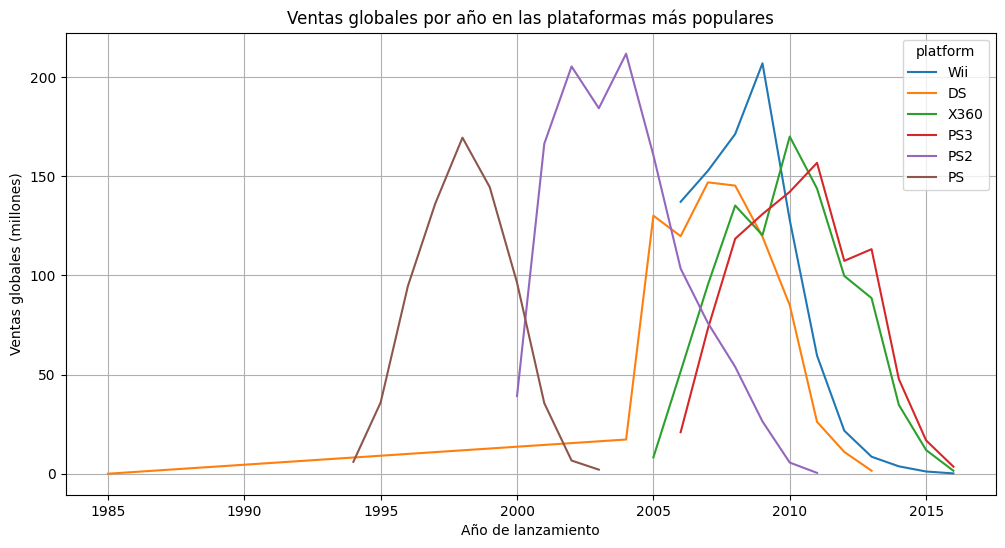

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sales_by_year,
    x='year_of_release',
    y='global_sales',
    hue='platform',
    estimator='sum',
    ci=None
)
plt.title('Ventas globales por año en las plataformas más populares')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de mostrar los datos, gracias a la gráfica podemos observar el tiempo de vida de cada una de las plataformas
</div>


In [11]:
year_platform_sales = df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='global_sales',
    aggfunc='sum'
).fillna(0)

popular_platforms = platform_sales[platform_sales > 100].index
year_platform_sales_filtered = year_platform_sales[popular_platforms]

In [12]:
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min'] + 1
platform_lifespan = platform_lifespan.sort_values('lifespan', ascending=False)
platform_lifespan.head(10)

,min,max,lifespan
platform,,,
PC,1985.0,2016.0,32.0
DS,1985.0,2013.0,29.0
GB,1988.0,2001.0,14.0
X360,2005.0,2016.0,12.0
PSP,2004.0,2015.0,12.0
PS2,2000.0,2011.0,12.0
NES,1983.0,1994.0,12.0
DC,1998.0,2008.0,11.0
Wii,2006.0,2016.0,11.0


In [13]:
# Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
relevant_df = df[df['year_of_release'] >= 2013]

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Las consolas que muestran crecimiento entre 2013 a 2016 es PS4 Y Xbox One ya que son plataformas nuevas y estan en su fase activa y muestran un crecimiento de manera constante.

Text(0.5, 1.0, 'Distribución de ventas por plataforma')

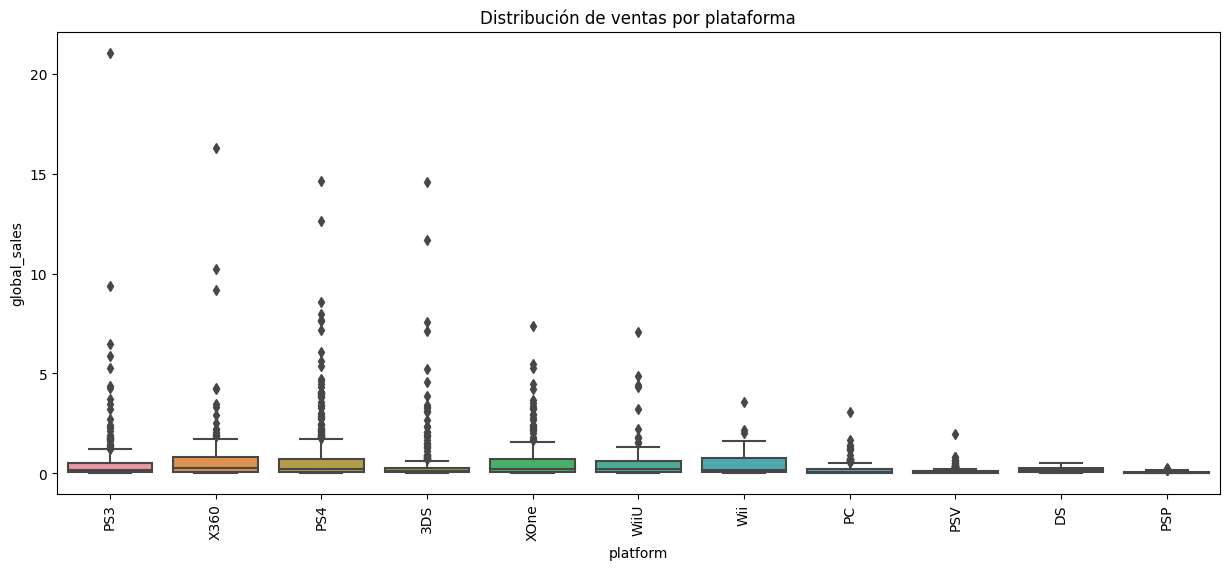

In [14]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.boxplot(x='platform', y='global_sales', data=relevant_df)
plt.xticks(rotation=90)
plt.title('Distribución de ventas por plataforma')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas plataformas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
    
Recomiendo utilizar el parametro `plt.yscale('log')` para que las cajas se muestren de una mejor manera
</div>


Text(0.5, 1.0, 'Distribución de ventas por plataforma')

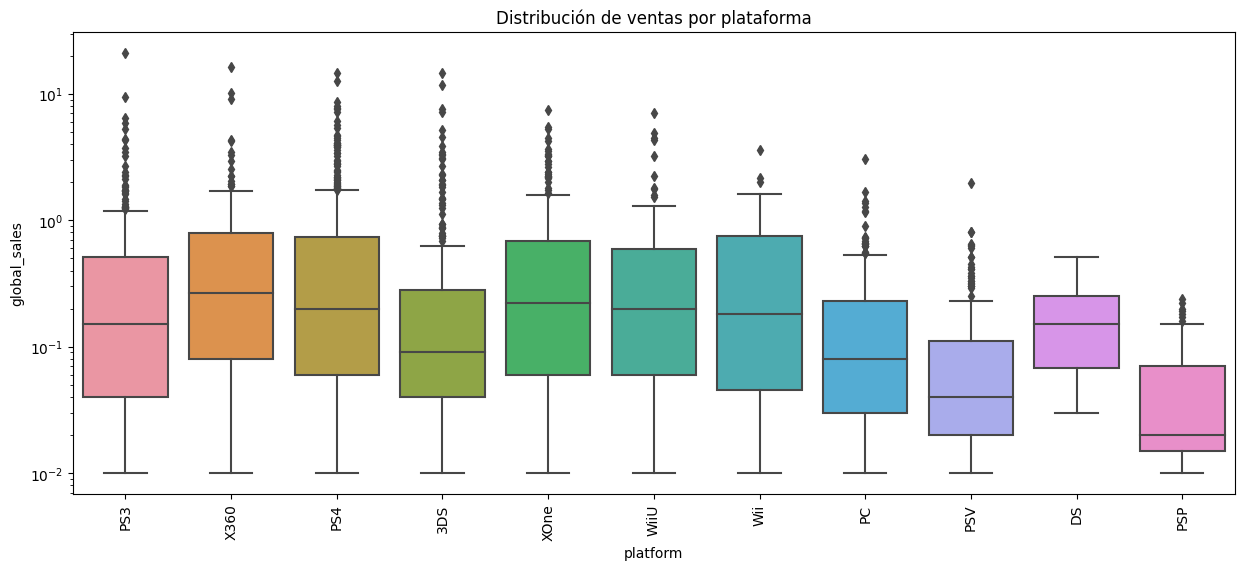

In [16]:
# Código del revisor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.boxplot(x='platform', y='global_sales', data=relevant_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribución de ventas por plataforma')

,critic_score,global_sales
critic_score,1.000000,0.406568
global_sales,0.406568,1.000000


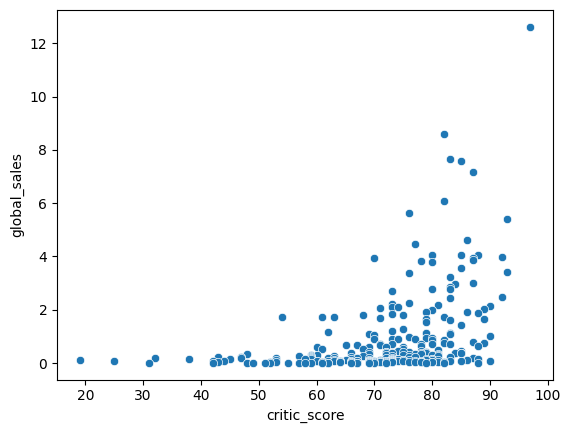

In [15]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
ps4 = relevant_df[relevant_df['platform'] == 'PS4']
sns.scatterplot(data=ps4, x='critic_score', y='global_sales')
ps4[['critic_score', 'global_sales']].corr()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar la correlación entre las ventas y las reseñas, la correlación es debil-moderada por lo que no siempre las buenas reseñas van a implicar un gran numero de ventas
</div>


### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Un mismo juego popular suele tener mayores ventas en plataformas con mayor cantidad de usuarios como en PS4 o Xbox 360 que en PC o en PSVita, además, las plataformas que gozan de mayor popularidad tienen mayores ventas debido a un mayor marketing y que llega a más usuarios.

Por otro lado las consolas portátiles como PSP tienen menores ventas ya sea por limitaciones técnicas o que llevan menor inversión y usualmente los juegos que funcionan en varias plataformas se concentran en vender en una o dos consolas que tienen mayor cantidad de usuarios.

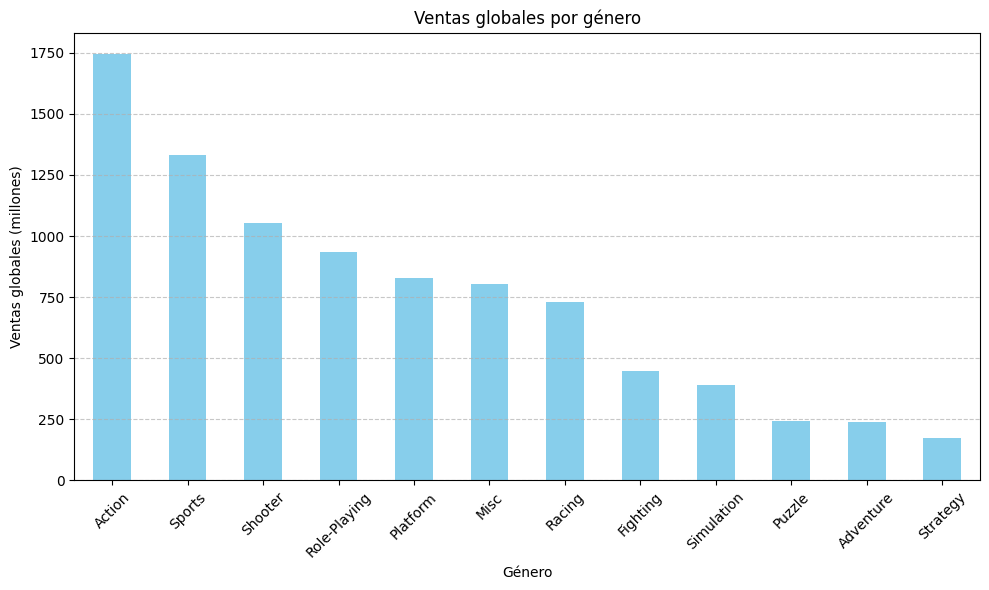

In [17]:
# Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas  y bajas?
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

genre_sales = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas globales por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los géneros preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


En el gráfico podemos ver que los géneros: Action, Sports, y Shooter son los géneros más rentables por contar con las mayores ventas. Por otro lado los géneros: Puzzle, Adventure, y Strategy son géneros con menores ventas.

### Paso 4: Crea un perfil de usuario para cada región

In [18]:
# Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales
platform,,,
X360,602.47,270.76,12.43
PS2,583.84,339.29,139.20
Wii,496.90,262.21,69.33
PS3,393.49,330.29,80.19
DS,382.40,188.89,175.57


In [19]:
# Los cinco géneros principales.
df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False).head()

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Shooter,592.24,317.34,38.76
Platform,445.50,200.35,130.83
Misc,407.27,212.74,108.11


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


Recomiendo agregar gráficas que acompañen a los datos mostrados en las tablas
</div>


<AxesSubplot:xlabel='rating'>

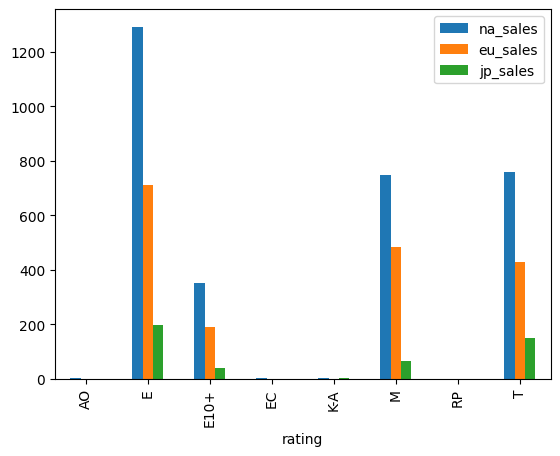

In [20]:
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar')

### Paso 5: Prueba las siguientes hipótesis:

#### - Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [21]:
from scipy import stats

xone = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

# H0: clasificaciones promedio iguales
# H1: clasificaciones promedio diferentes

alpha = 0.05
result = stats.ttest_ind(xone, pc)

print('p-valor:', result.pvalue)
if result.pvalue < alpha:
    print('Rechazamos H0: son diferentes')
else:
    print('No se rechaza H0: podrían ser iguales')


p-valor: 1.3896435533548819e-05
Rechazamos H0: son diferentes


#### - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [22]:
action = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

result = stats.ttest_ind(action, sports)
alpha = 0.05

print('p-valor:', result.pvalue)
if result.pvalue < alpha:
    print('Rechazamos H0: son diferentes')
else:
    print('No se rechaza H0: podrían ser iguales')

p-valor: 0.10406951359049141
No se rechaza H0: podrían ser iguales


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


#### - Establece tu mismo el valor de umbral alfa. Explica:
- Cómo formulaste las hipótesis nula y alternativa.

#### Alpha:
Sobre el valor de alpha establecí el valor de 0.05 ya que es el valor estándar en los análisis estadísticos.
Hipótesis nula:
La hipótesis nula es la primera suposición que se hace, en el primer caso dice que las calificaciones promedio son iguales.
Hipótesis alternativa:
En caso de la hipótesis alternativa es por ley lo contrario de la hipótesis nula, en el primer caso si la hipótesis nula es que son iguales la hipótesis alternativa es que son diferentes.

####  - Qué criterio utilizaste para probar las hipótesis y por qué.

#### Para ambos casos se usó una prueba de hipótesis de dos colas y el método que se uso es de la prueba t de Student por tener variables numéricas, se comparan medias de grupos distintos y el tamaño de la muestra es razonable para usar este método.

### Paso 6: Conclusión general

####Después de limpiar y preparar los datos, noté que varias columnas contenían valores ausentes, como user_score, critic_score y rating. En algunos casos, como con los valores “TBD” (a determinar), decidí reemplazarlos por nulos, ya que no representaban una puntuación válida. Opté por no rellenar los valores ausentes, porque hacerlo sin una base sólida podría introducir errores o sesgos en el análisis. En general, preferí trabajar con los datos más fiables disponibles.

Durante el análisis, observé cómo las ventas de videojuegos han cambiado a lo largo del tiempo. Algunas plataformas, como PS2, X360 y Wii, fueron líderes en su momento, pero con el tiempo fueron reemplazadas por otras más recientes como PS4. Las plataformas tienen un ciclo de vida claro: suelen tardar algunos años en crecer, llegan a su punto máximo y luego desaparecen. También encontré diferencias claras entre regiones: en Norteamérica y Europa dominan géneros como Action y Shooter, mientras que en Japón se prefieren juegos de rol y plataformas de Nintendo como DS y 3DS.

Finalmente, los géneros con mayores ventas globales son Action, Sports y Shooter, los cuales suelen pertenecer a franquicias fuertes. Géneros como Puzzle o Strategy tienen menos ventas, probablemente por ser más de nicho. También pude comprobar que las calificaciones de críticos y usuarios tienen una relación moderada con las ventas. A través de pruebas de hipótesis, confirmé diferencias de percepción entre géneros, como entre Acción y Deportes, pero no encontré diferencias significativas entre plataformas como Xbox One y PC. En conjunto, este análisis me ayudó a entender mejor cómo funciona la industria del videojuego y qué factores son clave en su evolución.



## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, especialmente en la parte donde se comparan las distintas regiones del mundo

</div>
